In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
file = '../data/online_retail_clean.csv'
df = pd.read_csv(file, dtype={'InvoiceNo': np.object, 'CustomerID': np.object })
print(df.shape)


(541909, 8)


In [3]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [4]:
# Rm negative quantities and Unit Prices of 0
cond = (df.Quantity<= 0) | (df.UnitPrice == 0)
df[cond].shape
df = df[~cond]
df.shape


(530106, 8)

In [5]:
# Rm all rows with missing values

df = df.dropna() 
df.shape


(397884, 8)

In [6]:
df.describe()

,Quantity,UnitPrice
count,397884.000000,397884.000000
mean,12.988238,3.116488
std,179.331775,22.097877
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


In [7]:
df.UnitPrice.quantile(0.95)
df[df.UnitPrice < df.UnitPrice.quantile(0.95)].shape

(375216, 8)

In [8]:
cond = (df.Quantity < df.Quantity.quantile(0.95) ) & (df.UnitPrice < df.UnitPrice.quantile(0.95))

df = df[cond]
df.shape

(351957, 8)

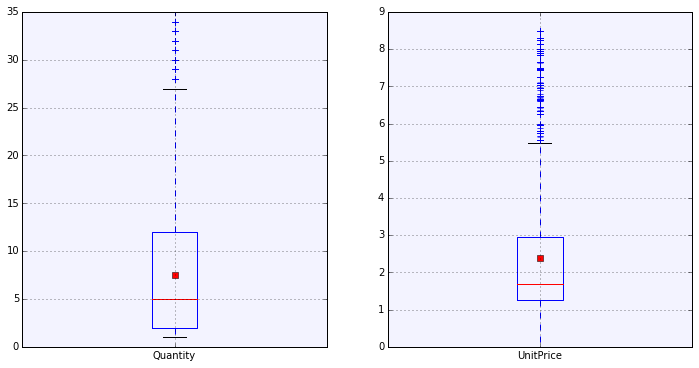

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.subplot(121)
df.boxplot(column=['Quantity'], showmeans= True, return_type='axes'); 
plt.subplot(122)
df.boxplot(column=['UnitPrice'], showmeans= True, return_type='axes'); 

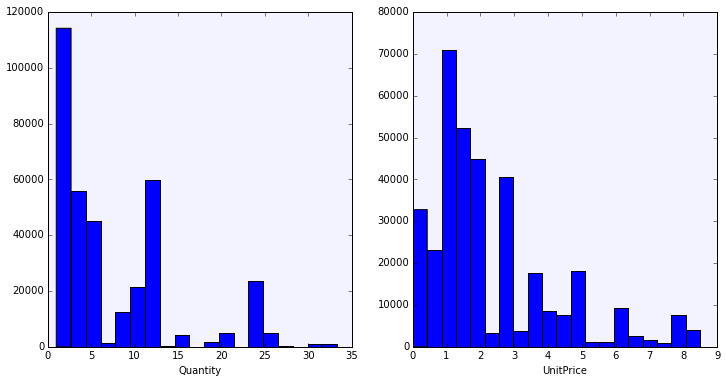

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.subplot(121)
plt.hist(df[['Quantity']].values, bins =20)
plt.xlabel('Quantity')
plt.subplot(122)
plt.hist(df[['UnitPrice']].values, bins =20)
plt.xlabel('UnitPrice')


/Users/aperrier/anaconda/envs/py34/lib/python3.4/site-packages/seaborn/linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/Users/aperrier/anaconda/envs/py34/lib/python3.4/site-packages/seaborn/linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


/Users/aperrier/anaconda/envs/py34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


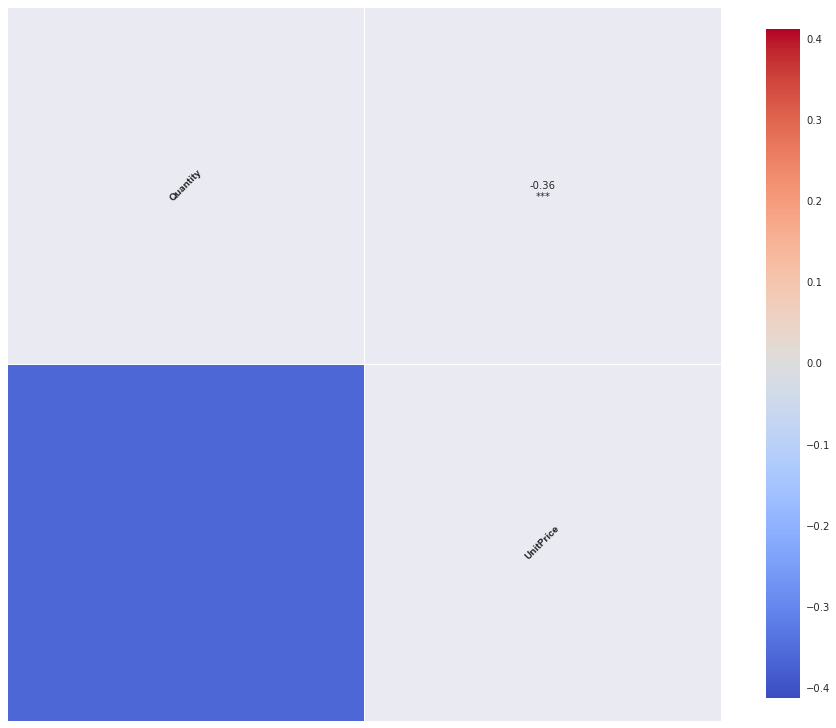

In [17]:
import seaborn as sns 
f, ax = plt.subplots(figsize=(16, 16))
sns.corrplot(df.sample(1000)[['Quantity','UnitPrice']], ax=ax)

/Users/aperrier/anaconda/envs/py34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


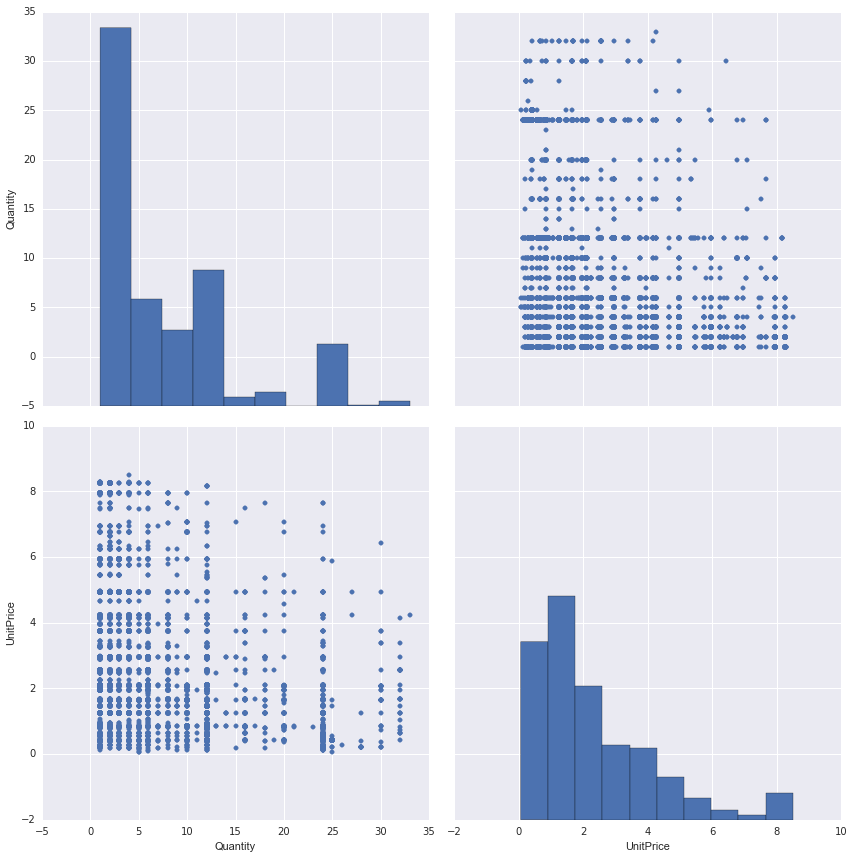

In [18]:
sns.pairplot(df.sample(10000)[['Quantity','UnitPrice']], size = 6)


# Normal Distribution

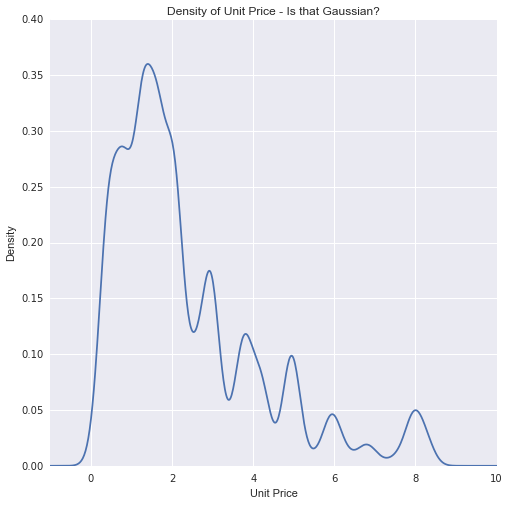

In [36]:
df.sample(50000).UnitPrice.plot(kind="density", xlim=(-1, 10), figsize=(8,8))
plt.xlabel("Unit Price")
plt.title("Density of Unit Price - Is that Gaussian?")

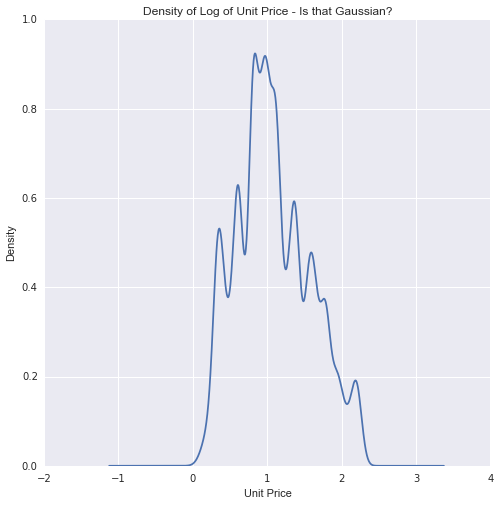

In [46]:
# Take the log to correct left skewness
data = np.log(df.UnitPrice.sample(20000) + 1)
data.plot(kind="density",  figsize=(8,8))
plt.xlabel("Unit Price")
plt.title("Density of Log of Unit Price - Is that Gaussian?")

0.15387742132215648

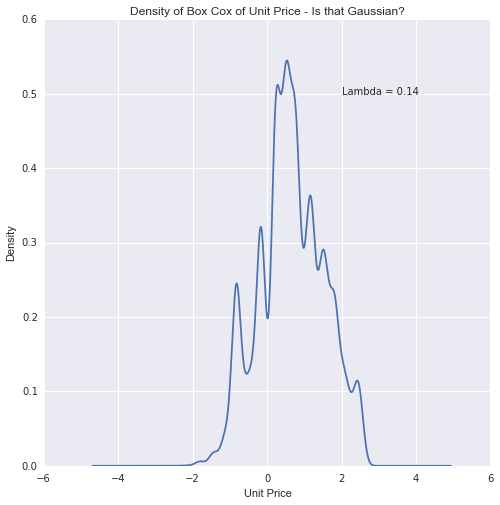

In [88]:
from scipy import stats

samples = df.UnitPrice.sample(20000)
data = pd.DataFrame( data = samples, columns = ['UnitPrice']  )
boxcox_samples = stats.boxcox(samples.values)[0]
lambd = stats.boxcox(samples.values)[1]
data['BoxCoxUnitPrice'] = boxcox_samples
data['BoxCoxUnitPrice'].plot(kind="density",  figsize=(8,8))
plt.xlabel("Unit Price")
plt.title("Density of Box Cox of Unit Price - Is that Gaussian?")
plt.annotate( "Lambda = 0.14 ", xy=(2, 0.5))
lambd

In [83]:
?plt.annotate
